# Capstone Project - Wine quality prediction thru ML

In [1]:
# Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings to ignore unnecessary warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset given.

wine_q = pd.read_csv('~/Downloads/Learnbay Datascience/Datasets/QualityPrediction.csv')
wine_q

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine_q.shape

(1599, 12)

In [4]:
wine_q.info()

# There are no null values in any of the datasets hence no need to to cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_q.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_q.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_q.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

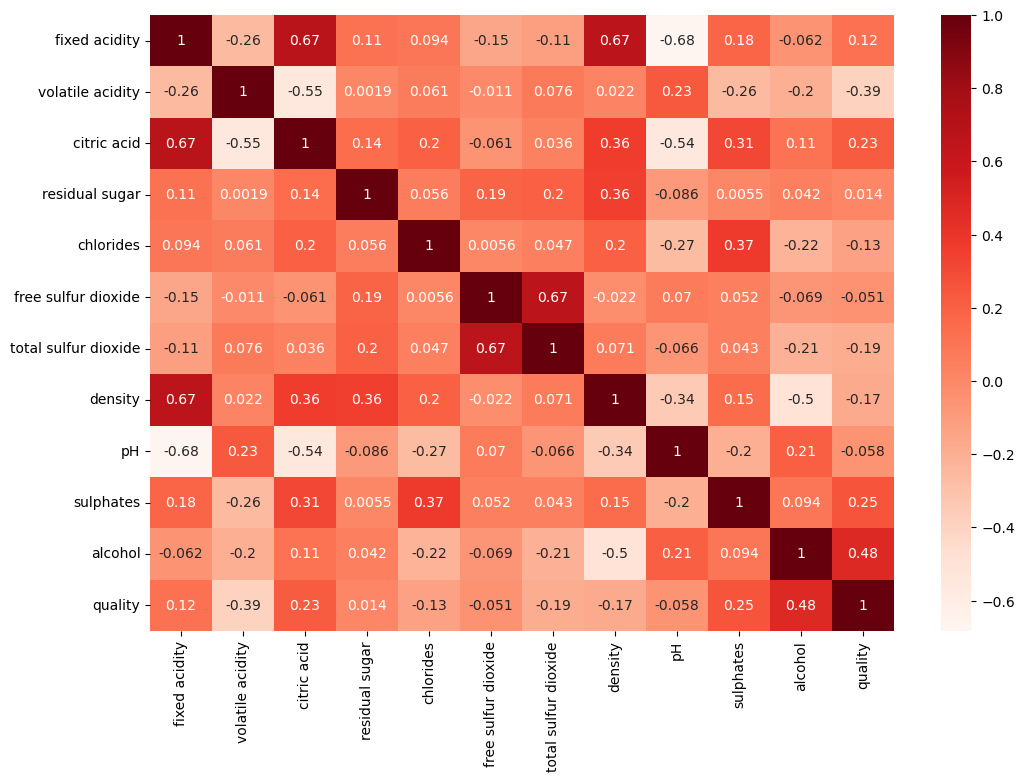

In [6]:
plt.figure(figsize = (12,8))
sns.heatmap(data = wine_q.corr(), cmap = 'Reds', annot = True)

# finding slight correlation between fixed acidity and citric acid (0.67) and quality and alcohol (0.48)

In [9]:
# help(sns.heatmap(data = wine_q.corr()))






# Target Analysis

In [7]:
wine_q['quality'].value_counts(normalize = True)

# It is observed that quality 5 has highest 42% samples followed by 40% quality 6 and both are amounting to
# 82% of total dataset

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

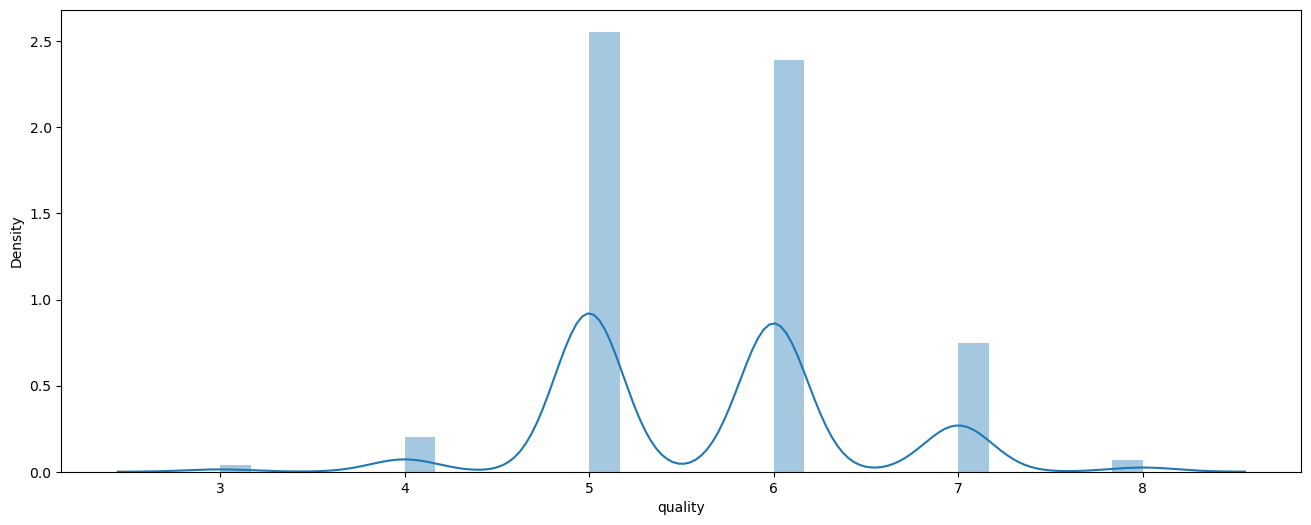

In [8]:
#plot the Quality
plt.figure(figsize = (16,6))
sns.distplot(wine_q['quality'])
plt.show()

# below plot shows more sample in the quality range of 5 and 6 and very less in 7 and 8 which is very good quality

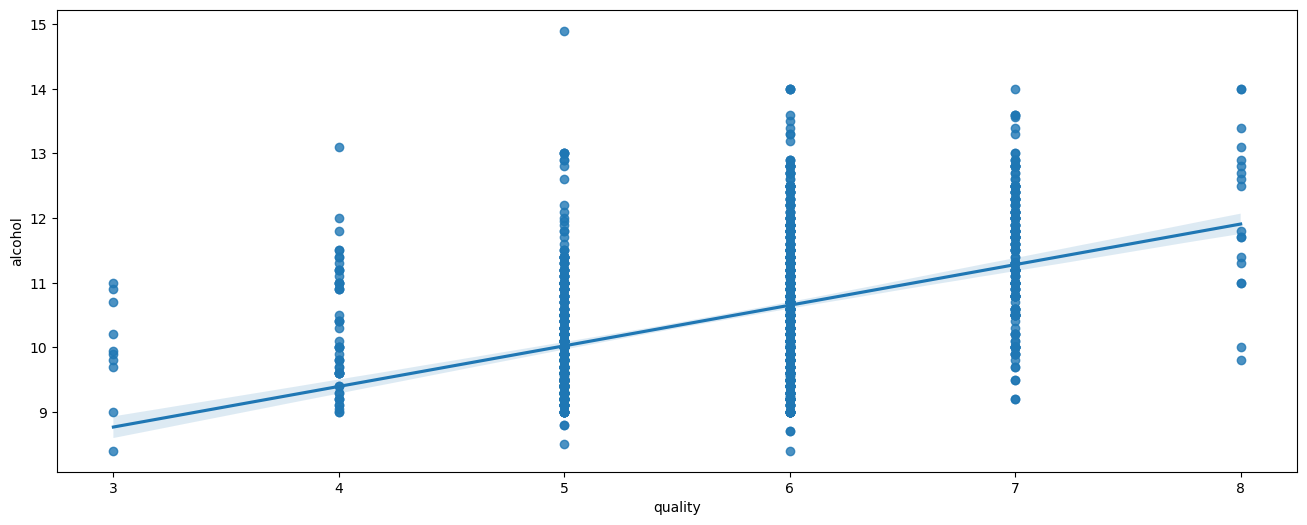

In [12]:
#Plotting the linear relationship between two sets of parameters quality vs alcohol and fixed acidity and citric acid 
plt.figure(figsize = (16,6))
sns.regplot(x= 'quality', y = 'alcohol' , data = wine_q)
plt.show()


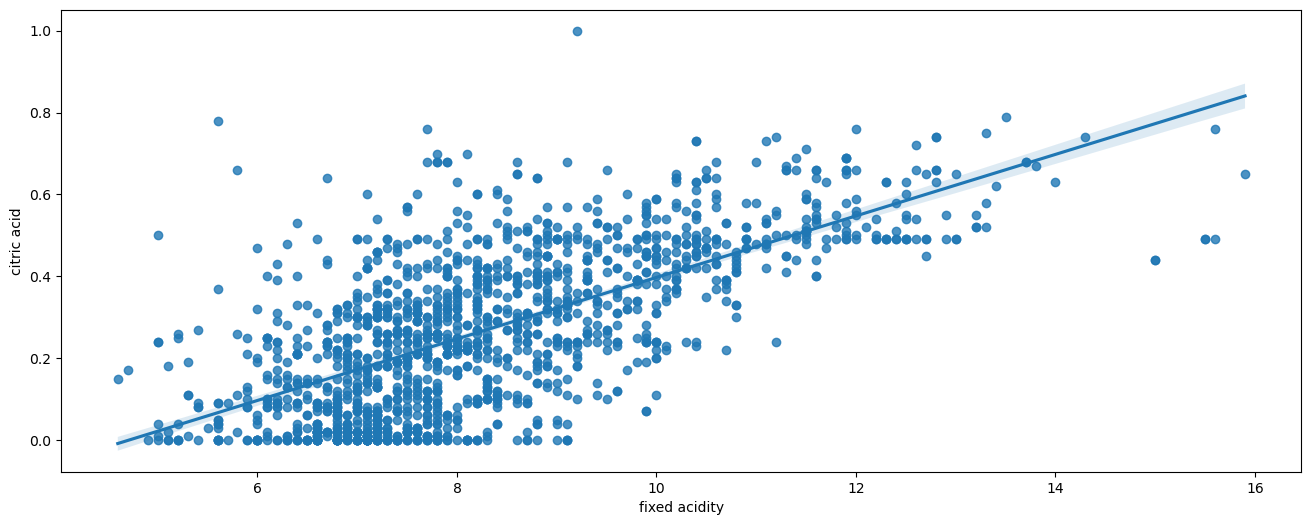

In [13]:
plt.figure(figsize = (16,6))
sns.regplot(x= 'fixed acidity', y = 'citric acid' , data = wine_q)
plt.show()

In [9]:
wine_q.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Univariate analysis of each feature

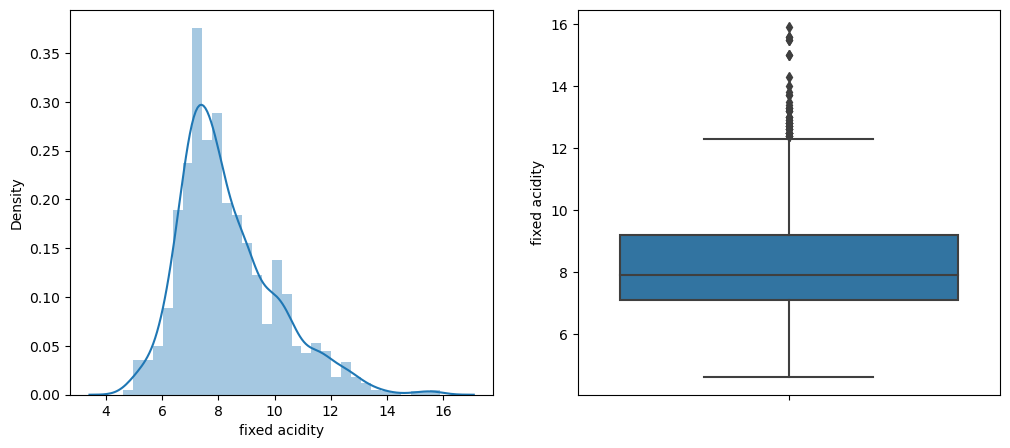

In [15]:
# Plot each feature to understand about each data
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['fixed acidity'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['fixed acidity'])
plt.show()



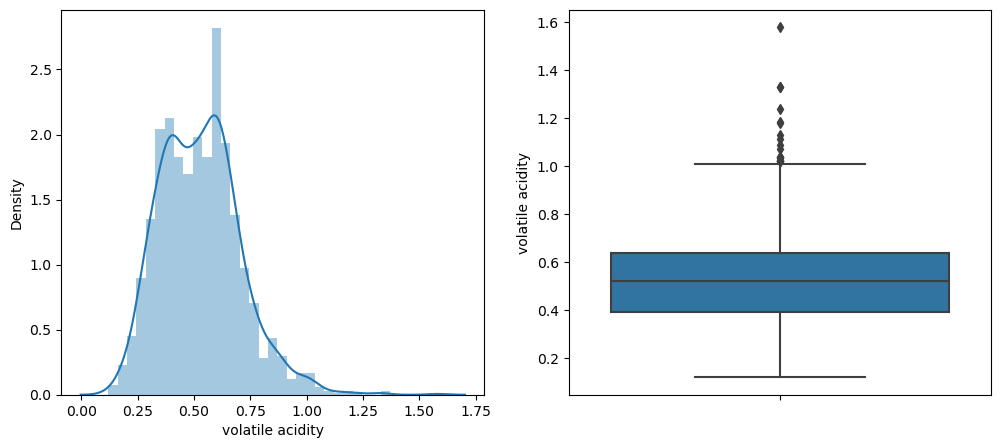

In [16]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['volatile acidity'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['volatile acidity'])
plt.show()

# outliers are available on positive side

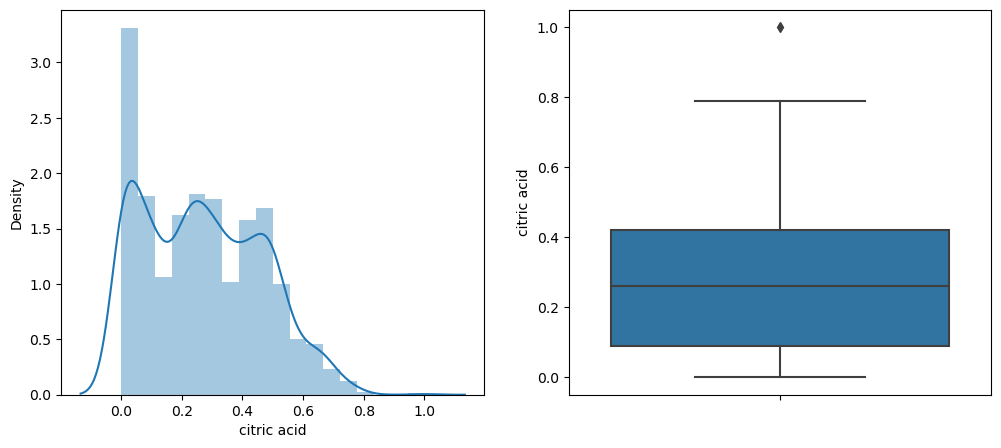

In [17]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['citric acid'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['citric acid'])
plt.show()

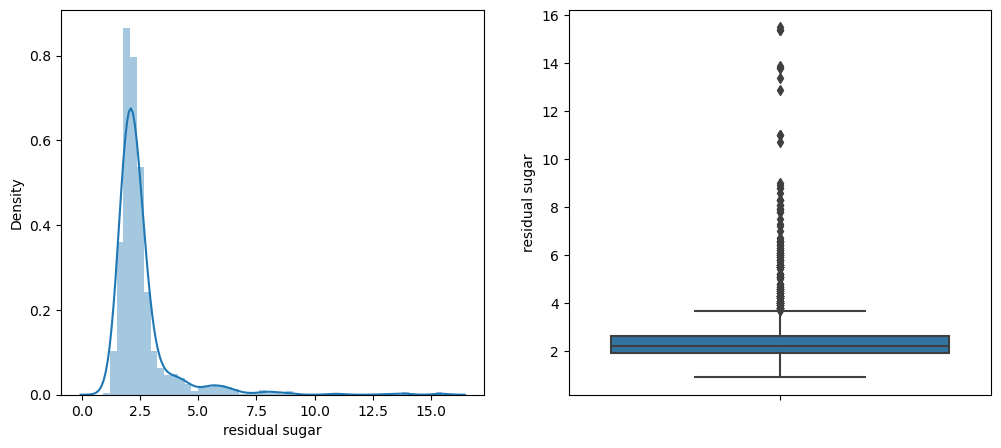

In [18]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['residual sugar'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['residual sugar'])
plt.show()

# this feature has very high number of outliers from value 4 and above.

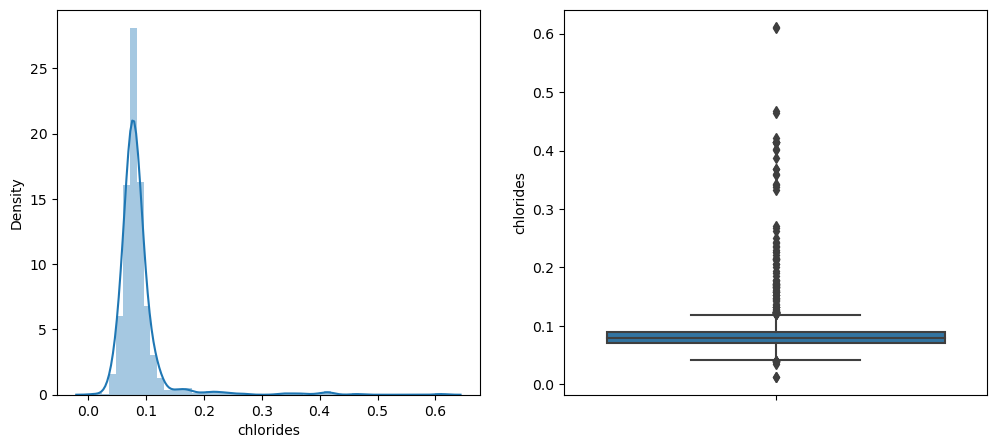

In [19]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['chlorides'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['chlorides'])
plt.show()

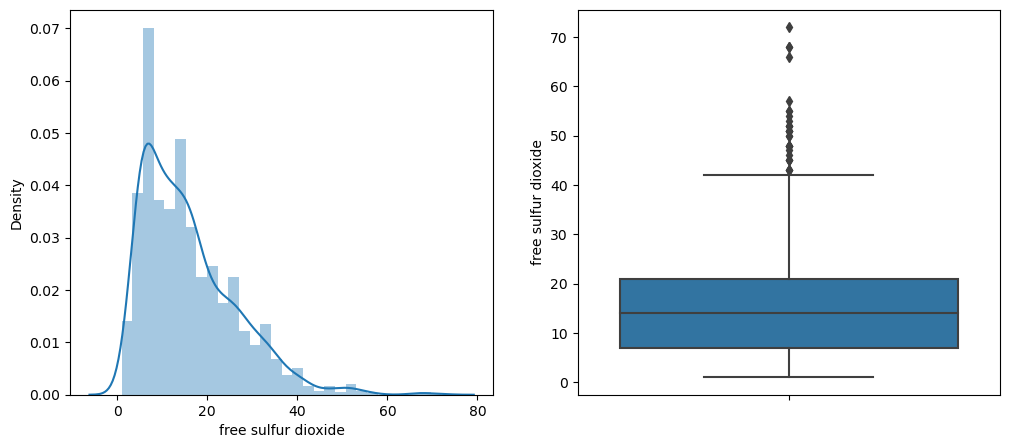

In [20]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['free sulfur dioxide'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['free sulfur dioxide'])
plt.show()

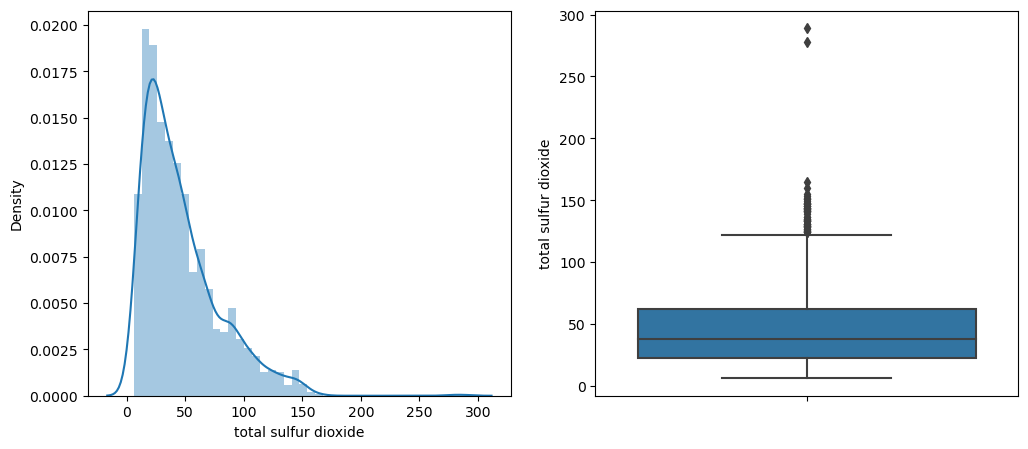

In [21]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['total sulfur dioxide'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['total sulfur dioxide'])
plt.show()

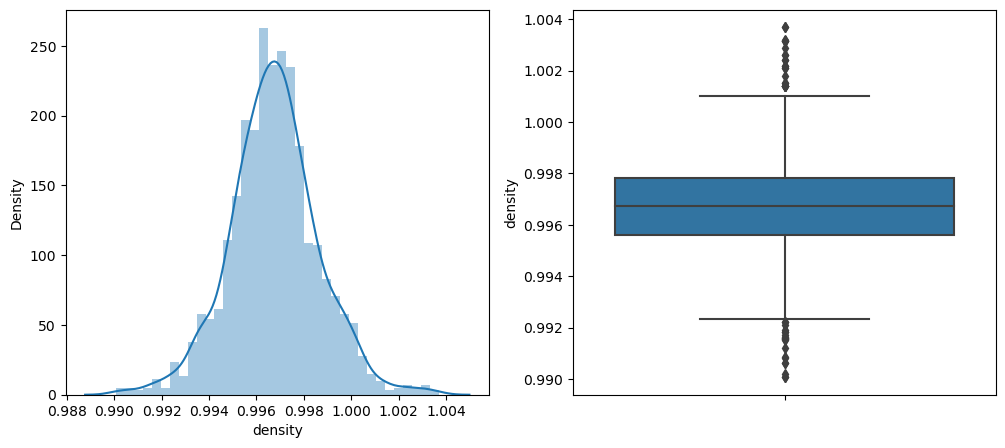

In [22]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['density'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['density'])
plt.show()

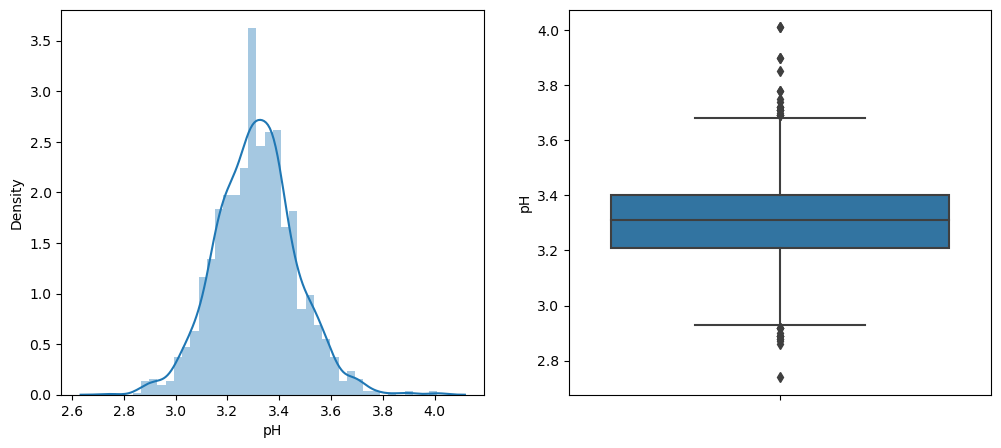

In [23]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['pH'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['pH'])
plt.show()

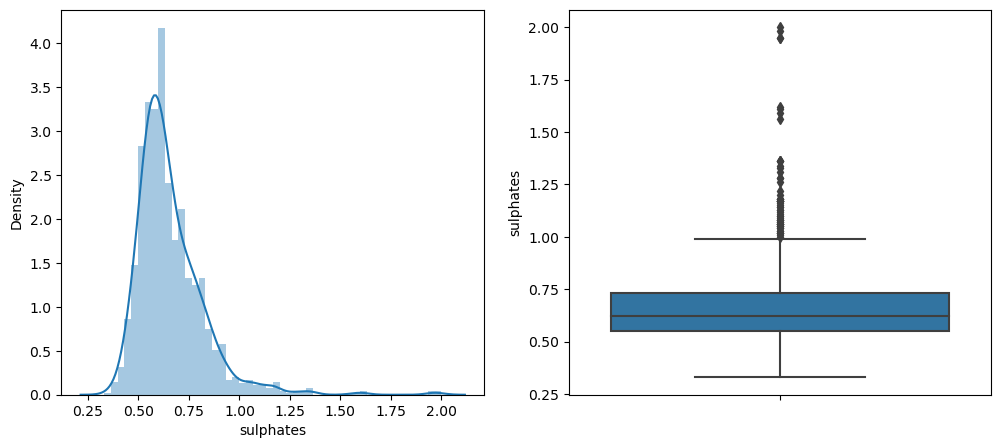

In [24]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['sulphates'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['sulphates'])
plt.show()

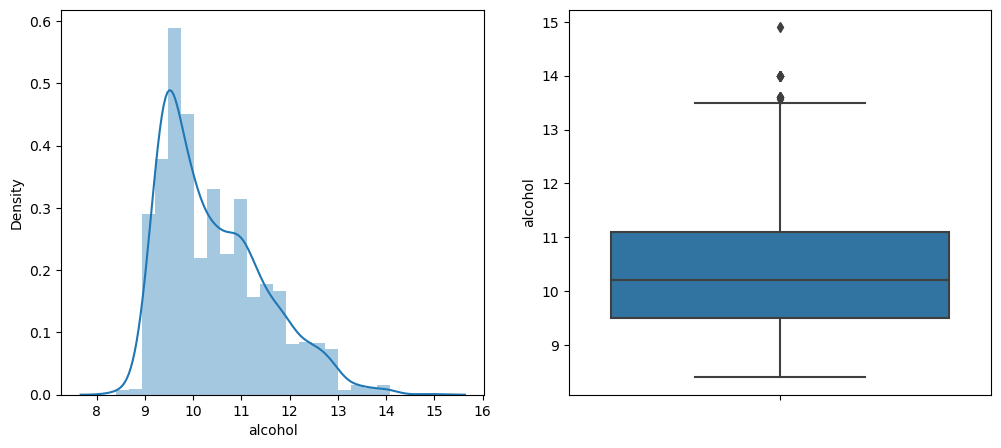

In [25]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(wine_q['alcohol'])
plt.subplot(1,2,2)
sns.boxplot(y = wine_q['alcohol'])
plt.show()

# Outlier evaluation in IQR and Z- score methods

In [26]:
##IQR method of detecting outliers

def iqr_func(data):
    Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    IQR=Q3-Q1
    lo=Q1-1.5*IQR
    uo=Q3+1.5*IQR
    outlier=[]
    for x in data:
        if ((x> uo) or (x<lo)):
            outlier.append(x)
    return outlier        
    
    
print('Outlier in the fixed acidity feature are : \n', iqr_func(wine_q['fixed acidity']))
print('Outlier in the volatile acidity feature are : \n', iqr_func(wine_q['volatile acidity']))
print('Outlier in the citric acid feature are : \n',iqr_func(wine_q['citric acid']))
print('Outlier in the residual sugar feature are : \n',iqr_func(wine_q['residual sugar']))
print('Outlier in the chlorides feature are : \n',iqr_func(wine_q['chlorides']))
print('Outlier in the free sulfur dioxide feature are : \n',iqr_func(wine_q['free sulfur dioxide']))
print('Outlier in the total sulfur dioxide feature are : \n',iqr_func(wine_q['total sulfur dioxide']))
print('Outlier in the density feature are : \n',iqr_func(wine_q['density']))
print('Outlier in the pH feature are : \n',iqr_func(wine_q['pH']))
print('Outlier in the sulphates feature are : \n',iqr_func(wine_q['sulphates']))
print('Outlier in the alcohol feature are : \n',iqr_func(wine_q['alcohol']))

Outlier in the fixed acidity feature are : 
 [12.8, 12.8, 15.0, 15.0, 12.5, 13.3, 13.4, 12.4, 12.5, 13.8, 13.5, 12.6, 12.5, 12.8, 12.8, 14.0, 13.7, 13.7, 12.7, 12.5, 12.8, 12.6, 15.6, 12.5, 13.0, 12.5, 13.3, 12.4, 12.5, 12.9, 14.3, 12.4, 15.5, 15.5, 15.6, 13.0, 12.7, 13.0, 12.7, 12.4, 12.7, 13.2, 13.2, 13.2, 15.9, 13.3, 12.9, 12.6, 12.6]
Outlier in the volatile acidity feature are : 
 [1.13, 1.02, 1.07, 1.33, 1.33, 1.04, 1.09, 1.04, 1.24, 1.185, 1.02, 1.035, 1.025, 1.115, 1.02, 1.02, 1.58, 1.18, 1.04]
Outlier in the citric acid feature are : 
 [1.0]
Outlier in the residual sugar feature are : 
 [6.1, 6.1, 3.8, 3.9, 4.4, 10.7, 5.5, 5.9, 5.9, 3.8, 5.1, 4.65, 4.65, 5.5, 5.5, 5.5, 5.5, 7.3, 7.2, 3.8, 5.6, 4.0, 4.0, 4.0, 4.0, 7.0, 4.0, 4.0, 6.4, 5.6, 5.6, 11.0, 11.0, 4.5, 4.8, 5.8, 5.8, 3.8, 4.4, 6.2, 4.2, 7.9, 7.9, 3.7, 4.5, 6.7, 6.6, 3.7, 5.2, 15.5, 4.1, 8.3, 6.55, 6.55, 4.6, 6.1, 4.3, 5.8, 5.15, 6.3, 4.2, 4.2, 4.6, 4.2, 4.6, 4.3, 4.3, 7.9, 4.6, 5.1, 5.6, 5.6, 6.0, 8.6, 7.5, 4.4, 4.25, 6.

In [27]:
## Z score method of detecting outliers

def norm_func(data):
    outlier=[]
    mean=np.mean(data)
    std=np.std(data)
    for x in data:
        z=(x-mean)/std
        if z>3 or z<-3:
            outlier.append(x)
    return outlier
    
    

print('Outlier in the fixed acidity feature are : ', norm_func(wine_q['fixed acidity']))
print('Outlier in the volatile acidity feature are : ', norm_func(wine_q['volatile acidity']))
print('Outlier in the citric acid feature are : ', norm_func(wine_q['citric acid']))
print('Outlier in the residual sugar feature are : ', norm_func(wine_q['residual sugar']))
print('Outlier in the chlorides feature are : ', norm_func(wine_q['chlorides']))
print('Outlier in the free sulfur dioxide feature are : ', norm_func(wine_q['free sulfur dioxide']))
print('Outlier in the total sulfur dioxide feature are : ', norm_func(wine_q['total sulfur dioxide']))
print('Outlier in the density feature are : ', norm_func(wine_q['density']))
print('Outlier in the pH feature are : ', norm_func(wine_q['pH']))
print('Outlier in the sulphates feature are : ', norm_func(wine_q['sulphates']))
print('Outlier in the alcohol feature are : ', norm_func(wine_q['alcohol']))

Outlier in the fixed acidity feature are :  [15.0, 15.0, 13.8, 14.0, 13.7, 13.7, 15.6, 14.3, 15.5, 15.5, 15.6, 15.9]
Outlier in the volatile acidity feature are :  [1.13, 1.07, 1.33, 1.33, 1.09, 1.24, 1.185, 1.115, 1.58, 1.18]
Outlier in the citric acid feature are :  [1.0]
Outlier in the residual sugar feature are :  [10.7, 7.3, 7.2, 7.0, 11.0, 11.0, 7.9, 7.9, 15.5, 8.3, 7.9, 8.6, 7.5, 9.0, 8.8, 8.8, 8.9, 8.1, 8.1, 8.3, 8.3, 7.8, 12.9, 13.4, 15.4, 15.4, 13.8, 13.8, 13.9, 7.8]
Outlier in the chlorides feature are :  [0.368, 0.341, 0.332, 0.464, 0.401, 0.467, 0.236, 0.61, 0.36, 0.27, 0.337, 0.263, 0.611, 0.358, 0.343, 0.413, 0.25, 0.422, 0.387, 0.415, 0.243, 0.241, 0.414, 0.369, 0.403, 0.414, 0.415, 0.415, 0.267, 0.235, 0.23]
Outlier in the free sulfur dioxide feature are :  [52.0, 51.0, 50.0, 68.0, 68.0, 54.0, 53.0, 52.0, 51.0, 57.0, 50.0, 48.0, 48.0, 72.0, 51.0, 51.0, 52.0, 55.0, 55.0, 48.0, 48.0, 66.0]
Outlier in the total sulfur dioxide feature are :  [148.0, 153.0, 165.0, 151.0, 14

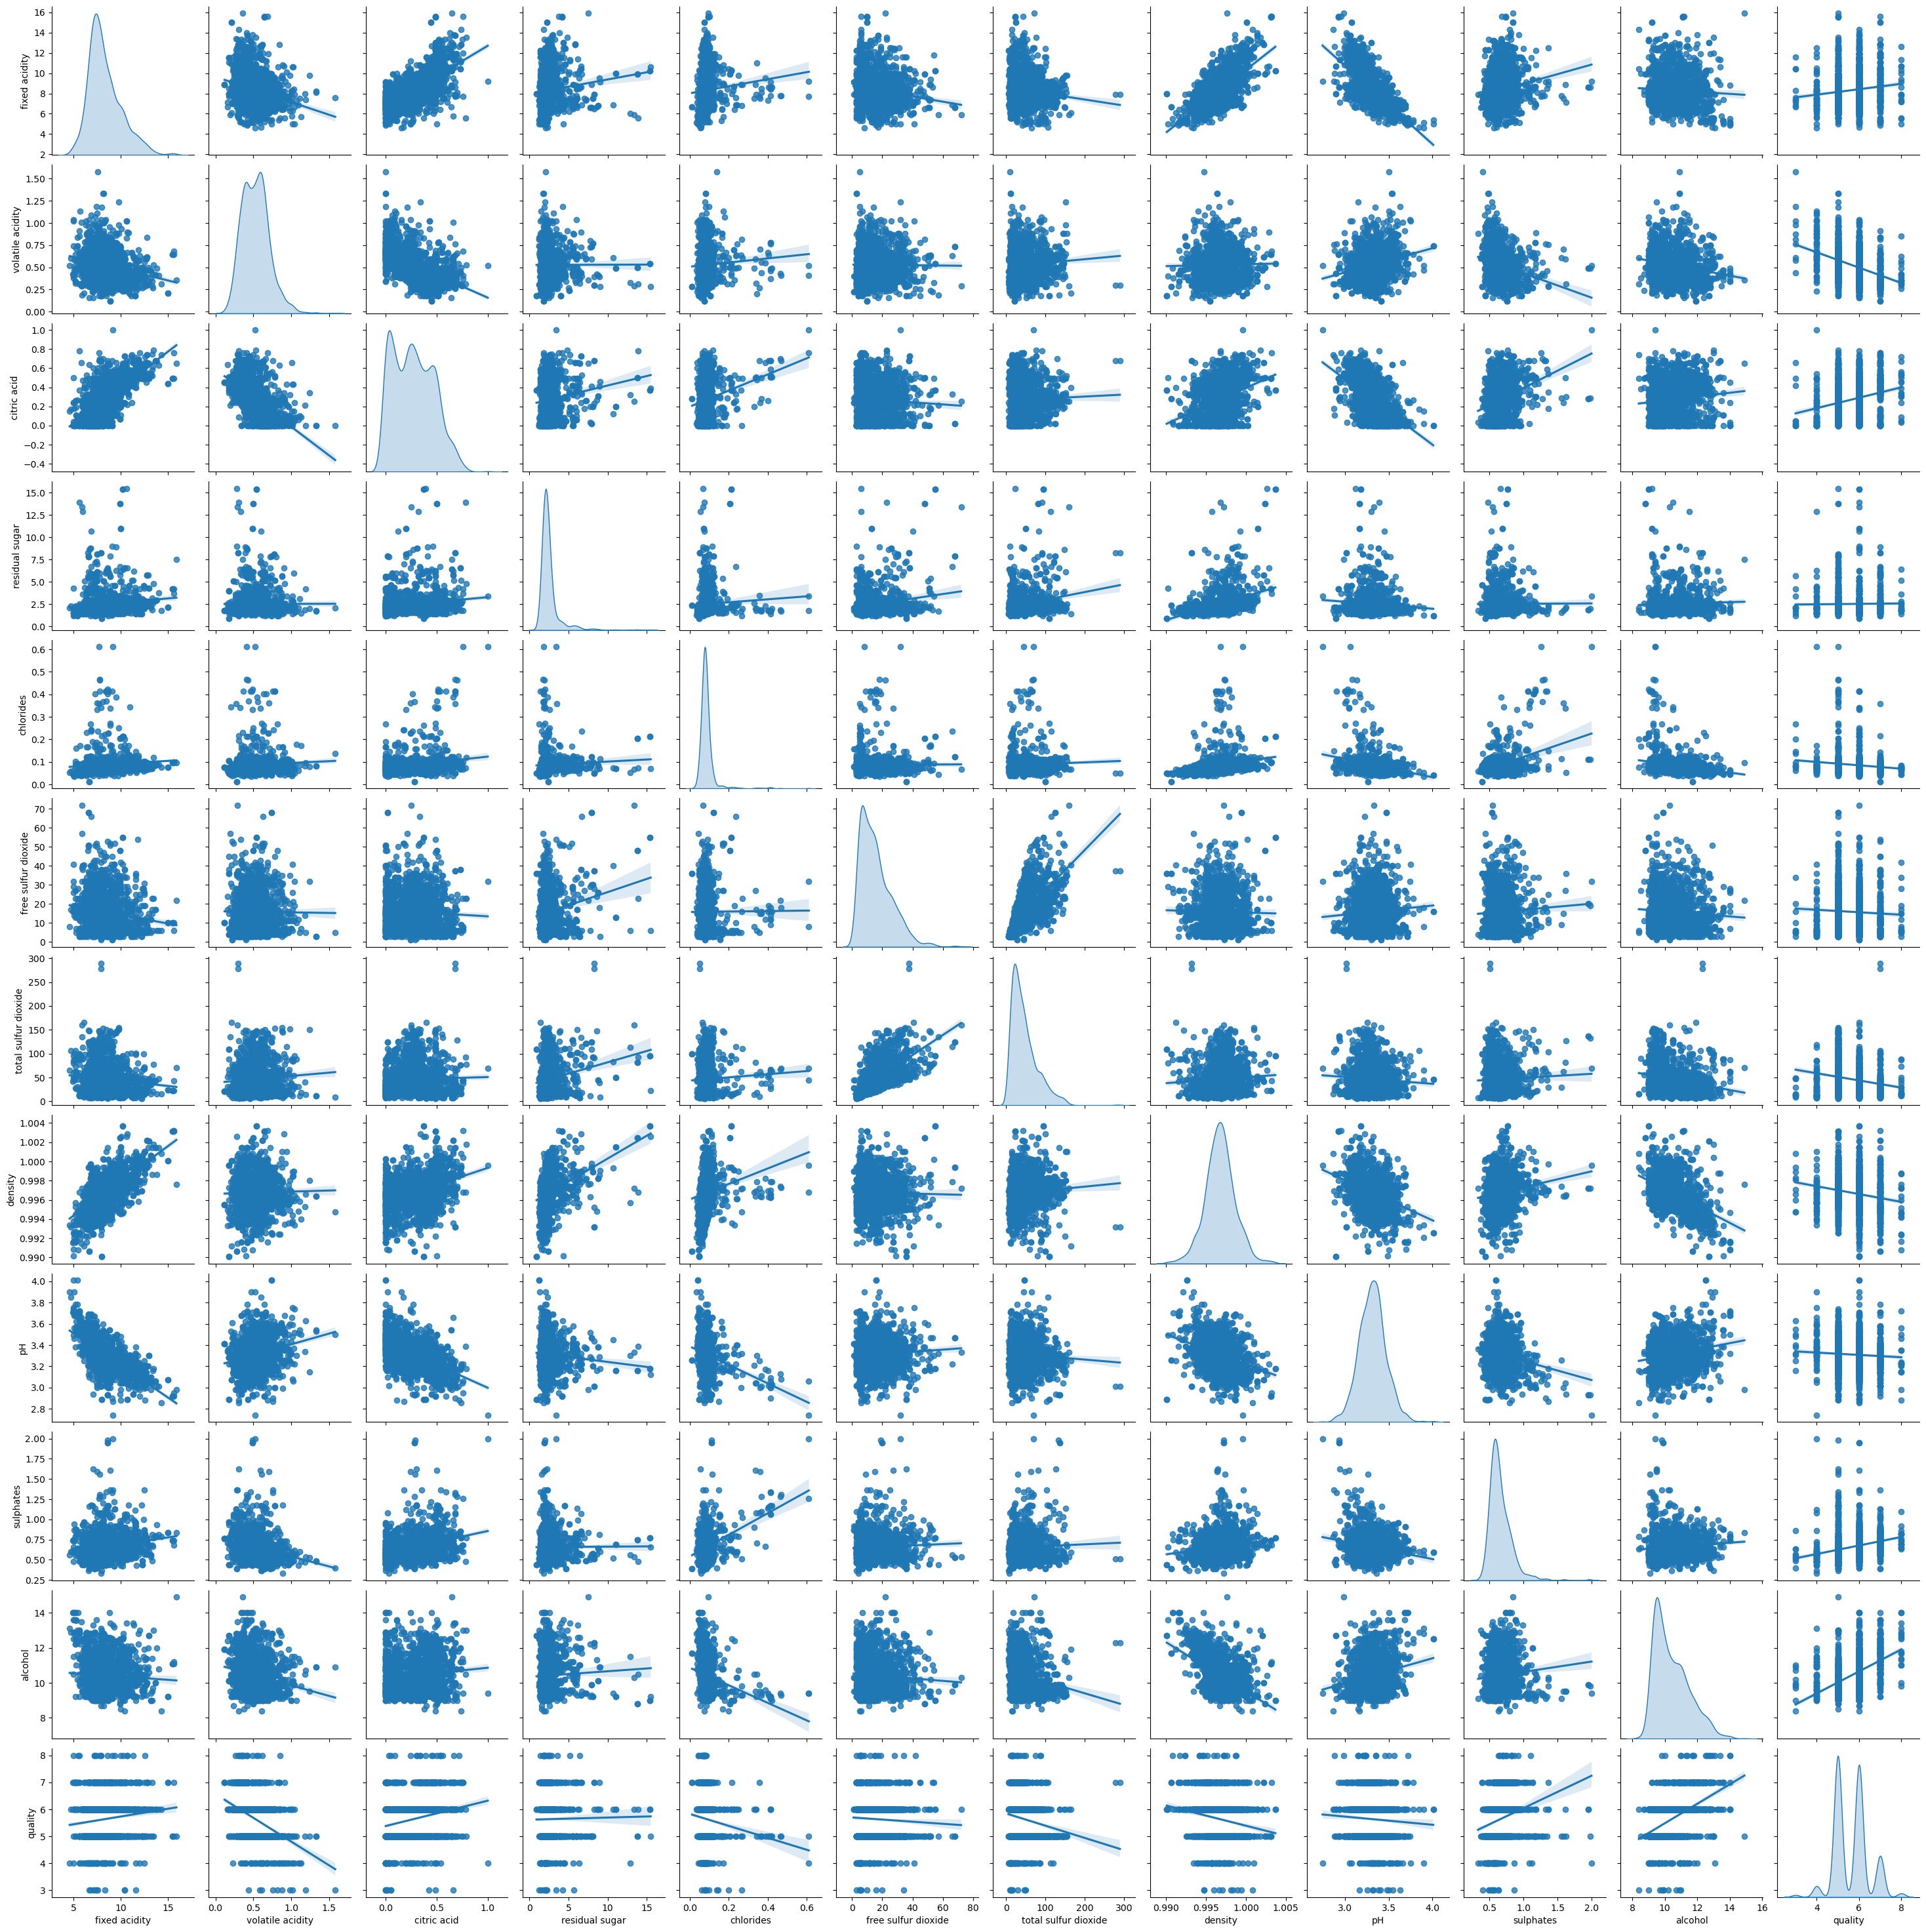

In [28]:
# plt.figure(figsize = (12,8))

sns.pairplot(wine_q, diag_kind = 'kde', kind = 'reg')

# Bi variate analysis of quality and each feature

<Axes: xlabel='quality', ylabel='fixed acidity'>

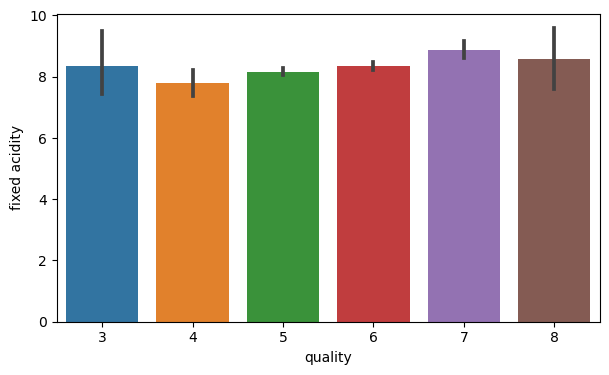

In [29]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_q)

<Axes: xlabel='quality', ylabel='volatile acidity'>

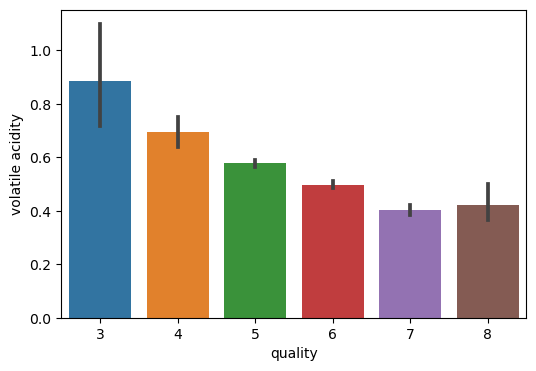

In [30]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_q)

<Axes: xlabel='quality', ylabel='citric acid'>

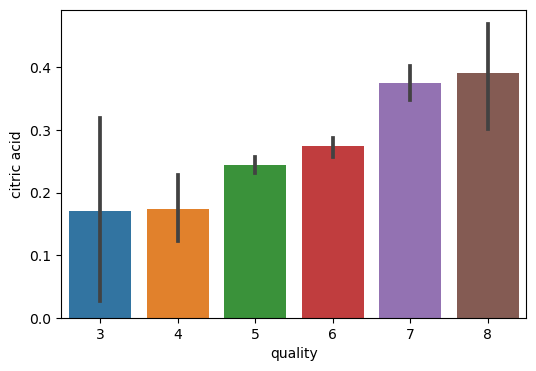

In [31]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_q)

<Axes: xlabel='quality', ylabel='residual sugar'>

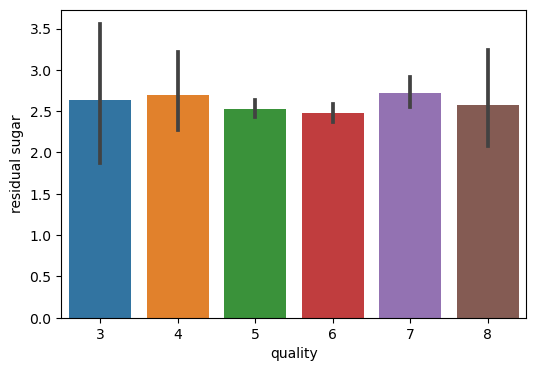

In [32]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_q)

<Axes: xlabel='quality', ylabel='chlorides'>

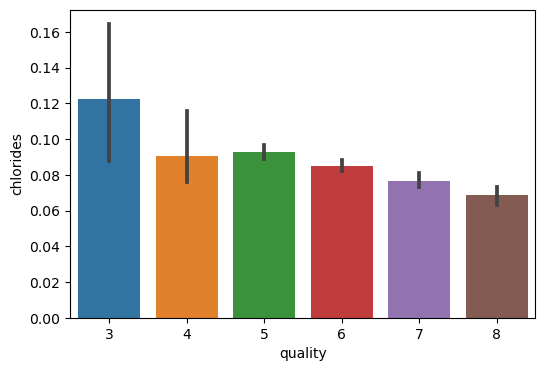

In [33]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_q)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

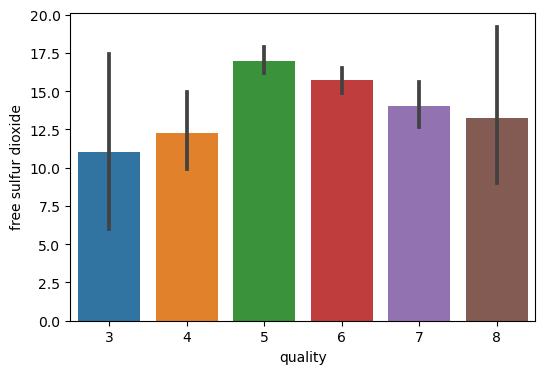

In [34]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_q)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

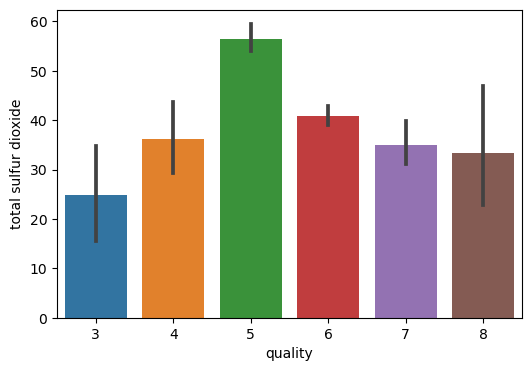

In [35]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_q)

<Axes: xlabel='quality', ylabel='density'>

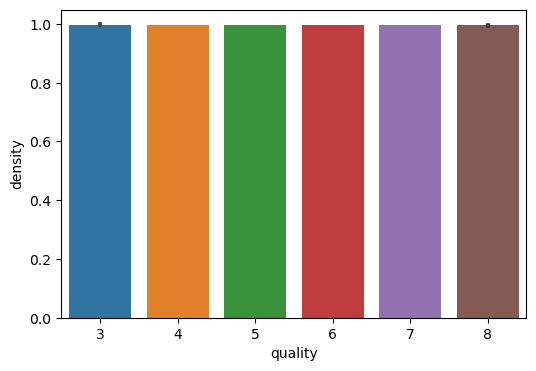

In [36]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'density', data = wine_q)

<Axes: xlabel='quality', ylabel='pH'>

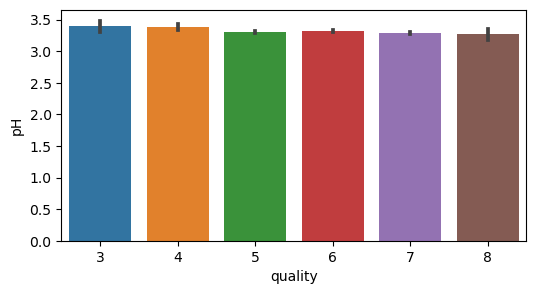

In [37]:
plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'pH', data = wine_q)

<Axes: xlabel='quality', ylabel='sulphates'>

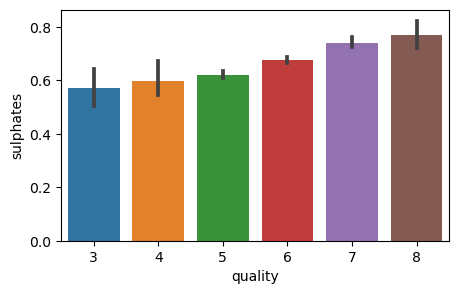

In [38]:
plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_q)

<Axes: xlabel='quality', ylabel='alcohol'>

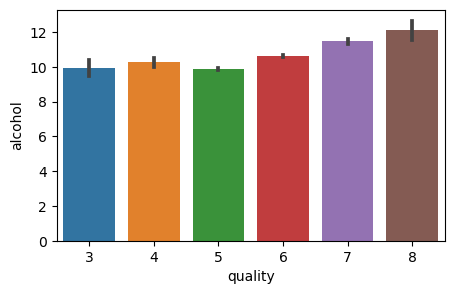

In [39]:
plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_q)

# Testing model with Logistric Regression model

In [40]:
# The output/dependent variable 'quality' is categorical with 5 categories from 3 to 8. 
# We need to divide these categories in two classes 1, 0 so that logistic classification model can be applied.

# y = wine_q['quality'].apply(lambda y: 1 if y >= 6 else 0)
# y

In [10]:
# declare x 
x = wine_q.drop('quality', axis = 1)

In [11]:
y = wine_q['quality']

In [12]:
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_res = ss.fit_transform(x)


In [45]:
# VIF - determines the strength of correlation between independent variables
# if VIF is 1 means no correlation 
# if VIF is exceeding 5 to 10 high multicollinearity between this independent variable and others.


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_res,i) for i in range(x_res.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


In [15]:
x1 = x.drop(['density', 'fixed acidity'], axis = 1) # as VIF of these two variables is more than 5 and result multicollinearity
x1.shape

(1599, 9)

In [16]:
# rescaling x
# x1_res = ss.fit_transform(x1)
# x1_res.shape

In [50]:
# All the features have values in various ranges hence we need to apply scaling to bring them to comparable values.  
# Hence applying StandardScaler to do so
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# xTrain = ss.fit_transform(xTrain)
# xTest = ss.transform(xTest)
    


## Data Balancing

<Axes: xlabel='quality', ylabel='count'>

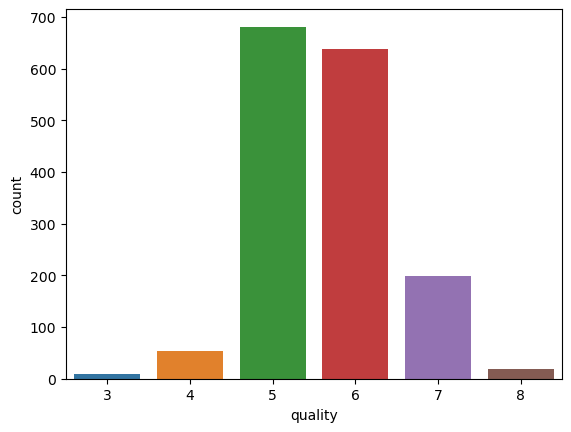

In [17]:
# plotting count plot for quality for better visualization
sns.countplot(data = wine_q, x = 'quality')

In [52]:
# !pip install scikit-learn==1.2.2

In [53]:
# !pip install imblearn

There is a huge imbalance in quality different classes and need to do balancing by using oversampling.

### Over sampling technique is used to modify the unequal data classes to create balanced data classes


## SMOTE

SMOTE works by utilizing k-nearest neighbor algorithm to create synthetic data

In this technique minority class is over sampled by producing synthetic examples rather than by over sampling with replacement and for each minority class observation.

In [18]:
# from imblearn.over_sampling import SMOTE
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

# Transform the dataset
X_res, y_res = oversample.fit_resample(x1, y)

In [19]:
X_res.shape, y_res.shape

((4086, 9), (4086,))

In [72]:
# Split the dataset in to Test, Train 
from sklearn.model_selection import train_test_split, GridSearchCV

xTrain, xTest, yTrain, yTest = train_test_split(x1, y, test_size = 0.2, random_state = 5)

In [73]:
# instantiate the logistic Regression model and fit the dataset in to the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instantiating the model
lr = LogisticRegression()

# fit the model to the dataset
lr.fit(xTrain, yTrain)

# predict the outcome
y_pred = lr.predict(xTest)
# y_pred =  np.asarray(y_pred).reshape(1,-1)
# yTest = np.asarray(yTest).reshape(1,-1)
y_pred

array([5, 6, 5, 6, 5, 5, 5, 7, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5,
       6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6,
       5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       7, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6,

In [22]:
# check the performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

In [74]:
print(accuracy_score(yTest, y_pred))

0.603125


In [75]:
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.71      0.79      0.75       152
           6       0.49      0.62      0.54       115
           7       0.50      0.05      0.09        40
           8       0.00      0.00      0.00         6

    accuracy                           0.60       320
   macro avg       0.28      0.24      0.23       320
weighted avg       0.57      0.60      0.56       320



In [76]:
print(confusion_matrix(yTest, y_pred))

[[  0   0   1   0   0   0]
 [  0   0   4   2   0   0]
 [  0   0 120  32   0   0]
 [  0   0  42  71   2   0]
 [  0   0   3  35   2   0]
 [  0   0   0   6   0   0]]


In [61]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression()>

# Hyper parameter tuning for improvement of Accuracy

In [62]:
# As the accuracy score is low need to improve with the help of hyperparamters tuning

param_dict = [{'penalty':['l1', 'l2', 'elasticnet'],
              'C':np.logspace(-4,4,20),
              'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
              'max_iter':[3, 5, 10, 20, 50, 100]}]


In [63]:
gsc = GridSearchCV(lr, param_grid = param_dict, scoring = 'accuracy', cv = 5, verbose = True, n_jobs = -1)
tuned_model = gsc.fit(xTrain, yTrain)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


In [64]:
tuned_model.best_params_

{'C': 545.5594781168514, 'max_iter': 5, 'penalty': 'l2', 'solver': 'sag'}

In [65]:
tuned_model.best_score_

0.5926286764705881

In [111]:
lr_finetuned = lr.set_params(C = 545.5594781168514, max_iter = 5, penalty = 'l2', solver = 'sag', random_state = 10)
                   

In [112]:
lr_final = lr_finetuned.fit(xTrain, yTrain)
y_pred_final = lr_final.predict(xTest)
print(accuracy_score(yTest, y_pred_final))

# Accuracy improved by almost 1%.

0.640625


In [118]:
print(classification_report(yTest, y_pred_final))

# observed improvement in precision

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.75      0.81      0.78       152
           6       0.53      0.61      0.57       115
           7       0.52      0.30      0.38        40
           8       0.00      0.00      0.00         6

    accuracy                           0.64       320
   macro avg       0.30      0.29      0.29       320
weighted avg       0.61      0.64      0.62       320



In [119]:
print(confusion_matrix(yTest, y_pred_final))

# Found improvement in confusion matrix also after hyperparameter tuning.

[[  0   0   1   0   0   0]
 [  0   0   3   2   1   0]
 [  0   0 123  29   0   0]
 [  0   0  36  70   9   0]
 [  0   0   2  26  12   0]
 [  0   0   0   5   1   0]]


In [70]:
# predictions_prob = lr_final.predict_proba(xTest)[:,1]
# fpr, tpr, _ = roc_curve(yTest, predictions_prob)
# auc(fpr, tpr)

# Random Forest ML model implementation

In [77]:
# import the required library
from sklearn.ensemble import RandomForestClassifier

# instantitate and fit the model
rfc = RandomForestClassifier(random_state = 10)
rfc.fit(xTrain, yTrain)

RandomForestClassifier(random_state=10)

In [78]:
# Predict the outcome
rfc_pred = rfc.predict(xTest)

In [79]:
print(accuracy_score(yTest, rfc_pred))

# observed improved accuracy in Random Forest model implementation

0.73125


In [80]:
print(classification_report(yTest, rfc_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.83      0.82      0.83       152
           6       0.63      0.77      0.69       115
           7       0.83      0.47      0.60        40
           8       0.50      0.17      0.25         6

    accuracy                           0.73       320
   macro avg       0.46      0.37      0.40       320
weighted avg       0.73      0.73      0.72       320



In [81]:
print(confusion_matrix(yTest, rfc_pred))

[[  0   1   0   0   0   0]
 [  1   0   2   3   0   0]
 [  0   0 125  27   0   0]
 [  0   0  23  89   3   0]
 [  0   0   1  19  19   1]
 [  0   0   0   4   1   1]]


In [76]:
# rfc.best_params_

# Trying Hyperparameter tuning for Random Forest model

In [77]:

from sklearn.model_selection import GridSearchCV

param_dict = {'bootstrap': [True, False],
    'max_features':[0.2, 0.4, 0.7, 1.0],
    'max_depth': [2, 3, 4, 5],
    'max_samples':[0.5, 0.75, 1.0],
    'n_estimators': [20, 40, 60, 100]}

gsv = GridSearchCV(estimator = rfc, param_grid = param_dict, cv=5, verbose = 2, n_jobs = -1)


In [78]:
gsv.fit(xTrain, yTrain)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 4, 5],
                         'max_features': [0.2, 0.4, 0.7, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 40, 60, 100]},
             verbose=2)

In [79]:
gsv.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 0.7,
 'max_samples': 0.75,
 'n_estimators': 100}

In [80]:
rfc_final = RandomForestClassifier(bootstrap = True, max_depth = 5, max_features = 0.7, max_samples = 0.75, n_estimators = 100, random_state = 10)
rfc_final.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=5, max_features=0.7, max_samples=0.75,
                       random_state=10)

In [81]:
rfc_final_pred = rfc_final.predict(xTest)

In [82]:
print(accuracy_score(yTest, rfc_final_pred))

0.665625


In [83]:
print(classification_report(yTest, rfc_final_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.77      0.80      0.78       152
           6       0.55      0.68      0.61       115
           7       0.70      0.35      0.47        40
           8       0.00      0.00      0.00         6

    accuracy                           0.67       320
   macro avg       0.34      0.30      0.31       320
weighted avg       0.65      0.67      0.65       320



In [84]:
print(confusion_matrix(yTest, rfc_final_pred))

[[  0   0   1   0   0   0]
 [  0   0   3   2   1   0]
 [  0   0 121  31   0   0]
 [  0   0  32  78   5   0]
 [  0   0   1  25  14   0]
 [  0   0   0   6   0   0]]


# Applying SVM model classifier 

In [82]:
svc = SVC(random_state = 5)
svc.fit(xTrain, yTrain)
y_pred_svm = svc.predict(xTest)
print('Accuracy Score : ', accuracy_score(yTest, y_pred_svm))

Accuracy Score :  0.50625


In [86]:
svc.gamma

'scale'

In [87]:
svc.C

1.0

In [88]:
svc.kernel

'rbf'

In [83]:
print(classification_report(yTest, y_pred_svm))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.74      0.42      0.54       152
           6       0.42      0.85      0.56       115
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         6

    accuracy                           0.51       320
   macro avg       0.19      0.21      0.18       320
weighted avg       0.50      0.51      0.46       320



In [84]:
print(confusion_matrix(yTest, y_pred_svm))

[[ 0  0  0  1  0  0]
 [ 0  0  1  5  0  0]
 [ 0  0 64 88  0  0]
 [ 0  0 17 98  0  0]
 [ 0  0  4 36  0  0]
 [ 0  0  1  5  0  0]]


In [91]:
param_dict = {'C':[0.1, 1, 10, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001], 
             'kernel': ['linear', 'rbf', 'poly']}

In [92]:
model_svc = GridSearchCV(svc, param_grid = param_dict, cv = 5, scoring = 'accuracy', verbose = True, n_jobs = -1)

In [93]:
# model_svc.fit(xTrain, yTrain)
# print(model_svc.best_score_)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 3)

In [34]:
knn.fit(xTrain, yTrain)

y_pred_knn = knn.predict(xTest)

In [35]:
print('Accuracy Score : ', accuracy_score(yTest, y_pred_knn))
print('\n')
print('Confusion Matrix with k = 3: \n', confusion_matrix(yTest,y_pred_knn))
print('\n')
print('Classification Report with k = 3 :\n', classification_report(yTest,y_pred_knn))

Accuracy Score :  0.7249388753056235


Confusion Matrix with k = 3: 
 [[130   2   1   6   1   0]
 [  5 127   8   4   0   0]
 [ 15  14  65  16  15   4]
 [ 16  18  28  37  29  11]
 [  2   3   4   4 115   3]
 [  0   2   3   5   6 119]]


Classification Report with k = 3 :
               precision    recall  f1-score   support

           3       0.77      0.93      0.84       140
           4       0.77      0.88      0.82       144
           5       0.60      0.50      0.55       129
           6       0.51      0.27      0.35       139
           7       0.69      0.88      0.77       131
           8       0.87      0.88      0.87       135

    accuracy                           0.72       818
   macro avg       0.70      0.72      0.70       818
weighted avg       0.70      0.72      0.70       818



In [85]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, xTrain, yTrain, cv = 10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy rate')

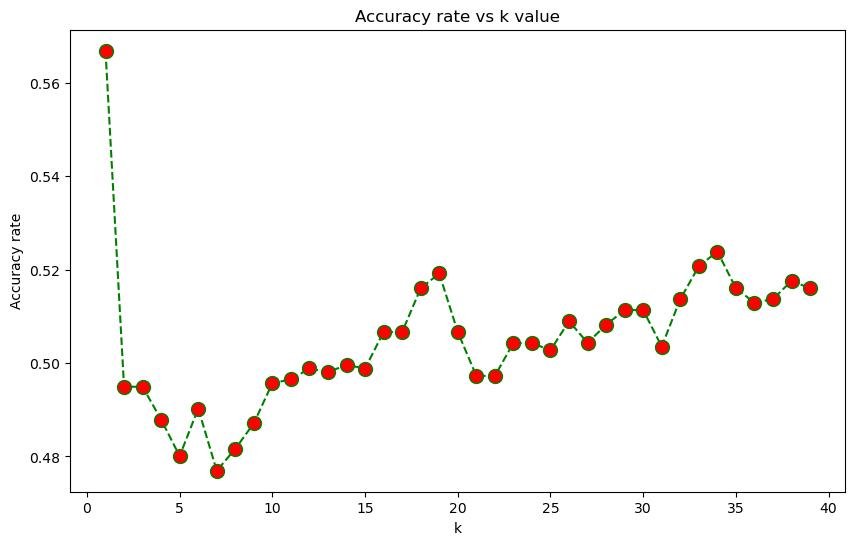

In [86]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), accuracy_rate, color = 'green', linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [87]:
# As per the accuracy rate plot found stabilised accuracy rate at k = 25
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(xTrain,yTrain)
pred_3 = knn.predict(xTest)

print('WITH K=3')
print('Accuracy Score : ', accuracy_score(yTest, pred_3))
print('\n')
print('Confusion Matrix with k = 3: \n', confusion_matrix(yTest,pred_3))
print('\n')
print('Classification Report with k = 3 :\n', classification_report(yTest,pred_3))

WITH K=3
Accuracy Score :  0.578125


Confusion Matrix with k = 3: 
 [[  0   0   1   0   0   0]
 [  0   0   3   3   0   0]
 [  0   6 108  34   4   0]
 [  0   4  41  63   7   0]
 [  0   0   7  19  14   0]
 [  0   0   2   3   1   0]]


Classification Report with k = 3 :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.67      0.71      0.69       152
           6       0.52      0.55      0.53       115
           7       0.54      0.35      0.42        40
           8       0.00      0.00      0.00         6

    accuracy                           0.58       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.57      0.58      0.57       320



In [100]:
# Better accuracy rate and precision observed with K = 3 only. Hence better parameters as per KNN model are

# Accuracy score = 0.878

In [88]:
# Using deep learning models for quality prediction
## initializing model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization



In [89]:
input_shape = xTrain.shape[1]
print(input_shape)

9


In [43]:
# xTrain[:,0].mean(), xTrain[:,0].std()

In [90]:
# early_stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 20, restore_best_weights = True)

model = Sequential()

model.add(Dense(units = 50, activation = 'relu', input_shape = (9,)))   # hidden layer1
# model.add(Dropout(0.3))
# model.add(BatchNormalization())

model.add(Dense(units = 40, activation = 'relu')) # hidden layer 2 
# model.add(Dropout(0.4)) 
# model.add(BatchNormalization())

model.add(Dense(units = 30, activation = 'relu')) # hidden layer3 
# model.add(Dropout(0.2)) 
# model.add(BatchNormalization())

model.add(Dense(units = 6, activation = 'softmax')) # output layer


    
    


In [91]:
# compilation of the model 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                500       
                                                                 
 dense_13 (Dense)            (None, 40)                2040      
                                                                 
 dense_14 (Dense)            (None, 30)                1230      
                                                                 
 dense_15 (Dense)            (None, 6)                 186       
                                                                 
Total params: 3956 (15.45 KB)
Trainable params: 3956 (15.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(xTrain)
X_test = scaler.fit(xTest)

In [93]:
encoder = OneHotEncoder(sparse = False)
Y_train = encoder.fit_transform(yTrain.values.reshape(-1,1))
Y_test = encoder.fit(yTest.values.reshape(-1,1))

In [97]:
# fitting the model

model.fit(X_train,Y_train,batch_size = 32,epochs = 100)

# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot()
# print('Minimum validation loss: {}'.format(history_df['val_loss'].min()))

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.8053
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8100
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.8131
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.8170
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.8163
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8170
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.8225
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8210
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8303
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8202
Epoch 11/

40/40 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9406
Epoch 84/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9304
Epoch 85/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9289
Epoch 86/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9414
Epoch 87/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9343
Epoch 88/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9421
Epoch 89/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9242
Epoch 90/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9343
Epoch 91/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9476
Epoch 92/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9468
Epoch 93/100


In [98]:
y_pred = encoder.inverse_transform(model.predict(xTest))
y_pred

10/10 [==============================] - 0s 2ms/step


array([[5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [7],
       [7],
       [5],
       [7],
       [5],
       [5],
       [5],
       [5],
       [5],
       [7],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [7],
       [5],
       [5],
       [7],
       [5],
       [7],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [7],
       [7],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [7],
       [5],
       [5],
       [5],
       [5],
       [7],
       [5],
       [5],
       [5],
       [5],
       [7],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
    

In [99]:
# y_pred = y_pred>0.5
print(accuracy_score(y_pred, yTest))

0.471875


# FINAL SUMMARY

1. Logistic Classification model - Accuracy - 0.868, Precision - 0.89, recall - 0.97, F1 - 0.93
2. Logistic Classification with Hyper para. tuning - Accuracy - 0.875, Precision - 0.89, recall - 0.98, F1 - 0.93
3. Random Forest Model - Accuracy - 0.906, Precision - 0.91, recall - 0.99, F1 - 0.95
4. Random Forest with Hyper para. tuning -  Accuracy - 0.878, Precision - 0.90, recall - 0.96, F1 - 0.93
5. SVC Classifier model - Accuracy - 0.881, Precision - 0.89, recall - 0.98, F1 - 0.93
6. KNN Classifier model - Accuracy - 0.878, Precision - 0.92, recall - 0.95, F1 - 0.93

CONCLUSION : OUT OF ABOVE ALL MODELS RANDOM FOREST CLASSIFIER MODEL IS GIVING BEST PARAMETERS WITH OUT HYPER PARAMETERS TUNING.